# 一、 异常检测 Anomaly detection

### 1.1 异常检测算法

通常如果我们认为变量 $x$ 符合高斯分布 $x \sim N(\mu, \sigma^2)$则其概率密度函数为：
$p(x,\mu,\sigma^2)=\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$

对于给定的数据集 $x^{(1)},x^{(2)},...,x^{(m)}$，我们要针对每一个特征计算 $\mu$ 和 $\sigma^2$ 的估计值。

$\mu_j=\frac{1}{m}\sum\limits_{i=1}^{m}x_j^{(i)}$

$\sigma_j^2=\frac{1}{m}\sum\limits_{i=1}^m(x_j^{(i)}-\mu_j)^2$

注：机器学习中对于方差我们通常只除以$m$而非统计学中的($(m-1)$ (其实这个差别很小)

一旦我们获得了平均值和方差的估计值，给定新的一个训练实例，根据模型计算 $p(x)$：

$p(x)=\prod\limits_{j=1}^np(x_j;\mu_j,\sigma_j^2)=\prod\limits_{j=1}^1\frac{1}{\sqrt{2\pi}\sigma_j}e^{(-\frac{(x_j-\mu_j)^2}{2\sigma_j^2})}$

当$p(x) < \varepsilon$时，为异常。

下图是一个由两个特征的训练集，以及特征的分布情况：

![](images/p041.png)

下面的三维图表表示的是密度估计函数，$z$轴为根据两个特征的值所估计$p(x)$值：

![](images/p042.jpg)

我们选择一个$\varepsilon$，将$p(x) = \varepsilon$作为我们的判定边界，当$p(x) > \varepsilon$时预测数据为正常数据，否则为异常 

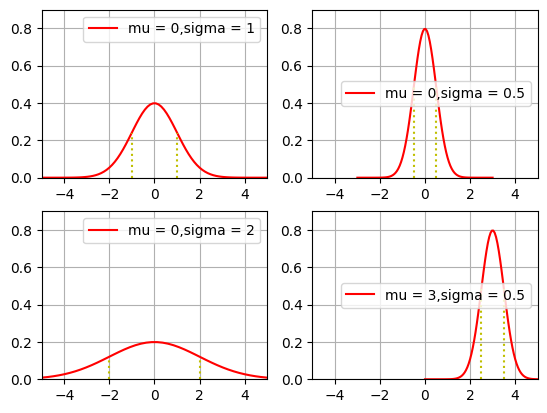

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
from my_draw import *
from utils import *
from scipy import stats
#plt.style.use('data/deeplearning.mplstyle')
draw_normal()

### 1.2 异常检测的评价

1. 根据测试集数据，我们估计特征的平均值和方差并构建$p(x)$函数

2. 对交叉检验集，我们尝试使用不同的$\varepsilon$值作为阀值，并预测数据是否异常，根据$F1$值或者查准率与查全率的比例来选择 $\varepsilon$

3. 选出 $\varepsilon$ 后，针对测试集进行预测，计算异常检验系统的$F1$值，或者查准率与查全率之比


之前我们构建的异常检测系统也使用了带标记的数据，与监督学习有些相似，但是两者仍有如下区别

| 异常检测                                                     | 监督学习                                                     |
| ------------------------------------------------------------ | ------------------------------------------------------------ |
| 非常少量的正向类（异常数据 $y=1$）, 大量的负向类（$y=0$）    | 同时有大量的正向类和负向类                                   |
| 许多不同种类的异常，非常难。根据非常 少量的正向类数据来训练算法。 | 有足够多的正向类实例，足够用于训练 算法，未来遇到的正向类实例可能与训练集中的非常近似。 |
| 未来遇到的异常可能与已掌握的异常、非常的不同。               |                                                              |
| 例如： 欺诈行为检测 生产（例如飞机引擎）检测数据中心的计算机运行状况 | 例如：邮件过滤器 天气预报 肿瘤分类                           |

### 1.3 选择特征

对于异常检测算法，我们使用的特征是至关重要的，下面谈谈如何选择特征：

异常检测假设特征符合高斯分布，如果数据的分布不是高斯分布，异常检测算法也能够工作，但是最好还是将数据**转换成高斯分布**，例如使用对数函数：$x= log(x+c)$，其中 $c$ 为非负常数； 或者 $x=x^c$，$c$为 0-1 之间的一个分数 (在**python**中，通常用`np.log1p()`函数，$log1p$就是 $log(x+1)$，可以避免出现负数结果，反向函数就是`np.expm1()`)

![](images/0990d6b7a5ab3c0036f42083fe2718c6.jpg)

误差分析：

一个常见的问题是一些异常的数据可能也会有较高的$p(x)$值，因而被算法认为是正常的。这种情况下误差分析能够帮助我们，我们可以分析那些被算法错误预测为正常的数据，观察能否找出一些问题。我们可能能从问题中发现我们需要增加一些新的特征，增加这些新特征后获得的新算法能够帮助我们更好地进行异常检测。



我们通常可以通过将一些相关的特征进行组合，来获得一些新的更好的特征（异常数据的该特征值异常地大或小），例如，在检测数据中心的计算机状况的例子中，我们可以用**CPU**负载与网络通信量的比例作为一个新的特征，如果该值异常地大，便有可能意味着该服务器是陷入了一些问题中

> 异常点检测实例

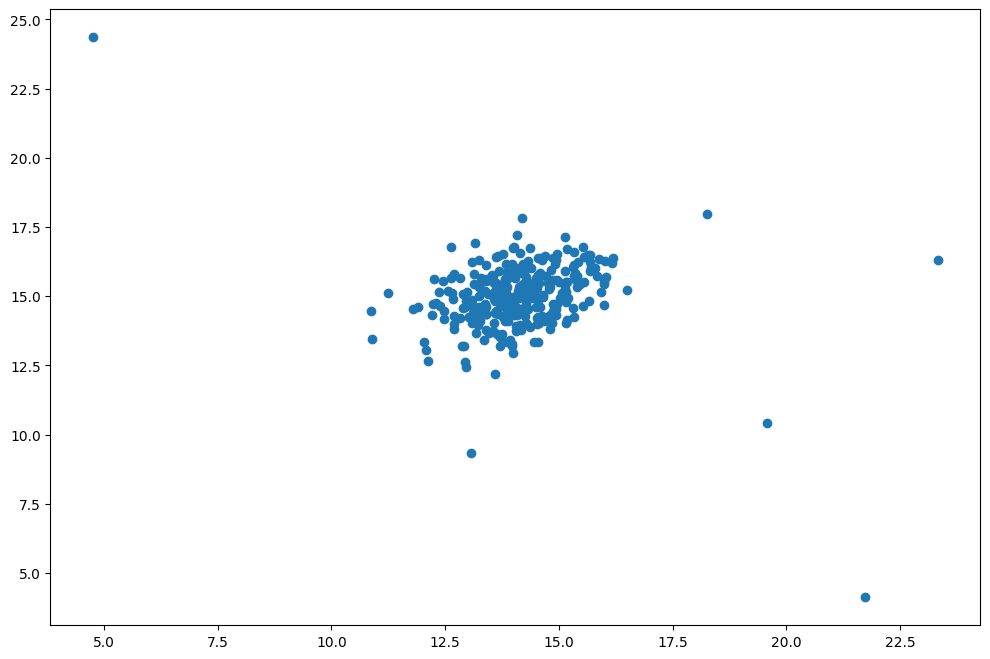

array([0.183842  , 0.20221694, 0.21746136, 0.19778763, 0.20858956,
       0.21652359, 0.16991291, 0.15123542, 0.1163989 , 0.1594734 ,
       0.21716057, 0.21760472, 0.20141857, 0.20157497, 0.21711385,
       0.21758775, 0.21695576, 0.2138258 , 0.21057069, 0.1173018 ,
       0.20765108, 0.21717452, 0.19510663, 0.21702152, 0.17429399,
       0.15413455, 0.21000109, 0.20223586, 0.21031898, 0.21313426,
       0.16158946, 0.2170794 , 0.17825767, 0.17414633, 0.1264951 ,
       0.19723662, 0.14538809, 0.21766361, 0.21191386, 0.21729442,
       0.21238912, 0.18799417, 0.21259798, 0.21752767, 0.20616968,
       0.21520366, 0.1280081 , 0.21768113, 0.21539967, 0.16913173])

In [200]:
data = loadmat('data/ex8data1.mat')
X = data['X']
Xval = data['Xval']
yval = data['yval']
def estimate_gaussian(X):
    mu = X.mean(axis=0)
    sigma = X.var(axis=0)
    return mu, sigma

mu, sigma = estimate_gaussian(X)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], X[:,1])
plt.show()
dist = stats.norm(mu[0], sigma[0]) # 使用scipy库计算概率密度
dist.pdf(15)
dist.pdf(X[:,0])[0:50] # 传递给概率密度函数

In [201]:
# 数据集 (307,2)
p = np.zeros((X.shape[0], X.shape[1]))  
p[:,0] = stats.norm(mu[0], sigma[0]).pdf(X[:,0])
p[:,1] = stats.norm(mu[1], sigma[1]).pdf(X[:,1])
# 验证集 (307,2)
pval = np.zeros((Xval.shape[0], Xval.shape[1]))
pval[:,0] = stats.norm(mu[0], sigma[0]).pdf(Xval[:,0])
pval[:,1] = stats.norm(mu[1], sigma[1]).pdf(Xval[:,1])

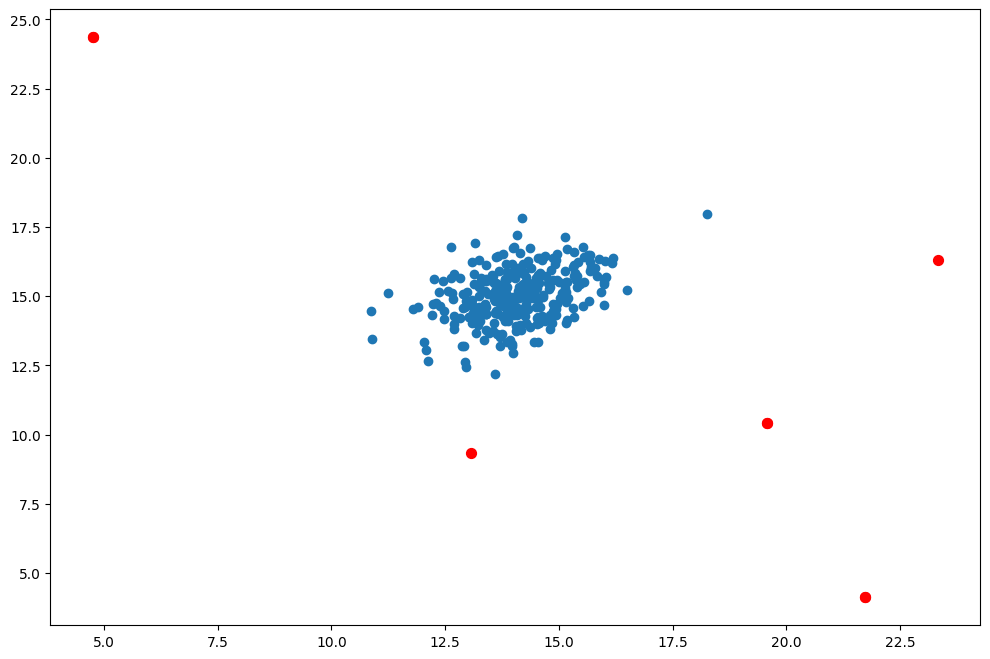

In [202]:
# 寻找最佳阈值
def select_threshold(pval, yval):
    best_epsilon = 0
    best_f1 = 0
    f1 = 0
    step = (pval.max() - pval.min()) / 1000
    for epsilon in np.arange(pval.min(), pval.max(), step):
        preds = pval < epsilon
        tp = np.sum(np.logical_and(preds == 1, yval == 1)).astype(float)
        fp = np.sum(np.logical_and(preds == 1, yval == 0)).astype(float)
        fn = np.sum(np.logical_and(preds == 0, yval == 1)).astype(float)
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        if (precision + recall) == 0:
            f1 =0
        else:
            f1 = (2 * precision * recall) / (precision + recall)
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon
    return best_epsilon, best_f1
epsilon, f1 = select_threshold(pval, yval) 
# indexes of the values considered to be outliers
outliers = np.where(p < epsilon)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], X[:,1])
ax.scatter(X[outliers[0],0], X[outliers[0],1], s=50, color='r', marker='o')
plt.show()

# 二、推荐系统
### 2.1 问题形式化

假使我们是一个电影供应商，我们有 5 部电影和 4 个用户，我们要求用户为电影打分。

![](images/p043.png)

下面引入一些标记：

$n_u$ 代表用户的数量

$n_m$ 代表电影的数量

$r(i, j)$ 如果用户j给电影 $i$ 评过分则 $r(i,j)=1$

$y^{(i, j)}$ 代表用户 $j$ 给电影$i$的评分

$m_j$代表用户 $j$ 评过分的电影的总数。 **和Rgression不同的是：推荐电影评分的代价函数不用除以m**是因为这里的m不是指用户的数量，而是指所有已评分的电影和用户的组合的数量。也就是说，如果有n部电影和m个用户，那么总共有nm种可能的评分，但是只有一部分实际上被评过分，我们用一个矩阵R来表示哪些评分是存在的。那么推荐电影评分的代价函数就是计算所有存在的评分与预测值之间的误差平方和，并加上正则化项。这里你可以看到，代价函数中有一个求和符号∑∑，它表示对所有满足R(i,j)=1（即已评过分）的i和j进行求和。所以这里实际上已经相当于除以了m，只不过这个m不是用户数量，而是已评分数量。可以假设每部电影都有两个特征，如$x_1$代表电影的浪漫程度，$x_2$ 代表电影的动作程度

$\theta^{(j)}$用户 $j$ 的参数向量    $x^{(i)}$电影 $i$ 的特征向量， 是待调的参数

对于用户 $j$ 和电影 $i$，我们预测评分为：$(\theta^{(j)})^T x^{(i)}$

针对用户 $j$，该线性回归模型的代价为预测误差的平方和，加上正则化项：
$$
\min_{\theta (j)}\frac{1}{2}\sum_{i:r(i,j)=1}\left((\theta^{(j)})^Tx^{(i)}-y^{(i,j)}\right)^2+\frac{\lambda}{2}\left(\theta_{k}^{(j)}\right)^2
$$


其中 $i:r(i,j)$表示我们只计算那些用户 $j$ 评过分的电影。在一般的线性回归模型中，误差项和正则项应该都是乘以$1/2m$，在这里我们将$m$去掉。并且我们不对方差项$\theta_0$进行正则化处理。

上面的代价函数只是针对一个用户的，为了学习所有用户，我们将所有用户的代价函数求和：
$$
\min_{\theta^{(1)},...,\theta^{(n_u)}} \frac{1}{2}\sum_{j=1}^{n_u}\sum_{i:r(i,j)=1}\left((\theta^{(j)})^Tx^{(i)}-y^{(i,j)}\right)^2+\frac{\lambda}{2}\sum_{j=1}^{n_u}\sum_{k=1}^{n}(\theta_k^{(j)})^2
$$
如果我们要用梯度下降法来求解最优解，我们计算代价函数的偏导数后得到梯度下降的更新公式为：

$$
\theta_k^{(j)}:=\theta_k^{(j)}-\alpha\sum_{i:r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})x_{k}^{(i)} \quad (\text{for} \, k = 0)
$$

$$
\theta_k^{(j)}:=\theta_k^{(j)}-\alpha\left(\sum_{i:r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})x_{k}^{(i)}+\lambda\theta_k^{(j)}\right) \quad (\text{for} \, k\neq 0)
$$

### 2.2 二进制标签
标签只有以下3种情况：

- `?` 还没有看到或者评价

- `0 `  不喜欢

- `1  ` 喜欢

![](images/p047.png)

### 2.3 协同过滤

在之前的基于内容的推荐系统中，对于每一部电影，我们都掌握了可用的特征，使用这些特征训练出了每一个用户的参数。相反地，如果我们拥有用户的参数，我们可以学习得出电影的特征。

$$
\mathop{min}\limits_{x^{(1)},...,x^{(n_m)}}\frac{1}{2}\sum_{i=1}^{n_m}\sum_{j{r(i,j)=1}}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})^2+\frac{\lambda}{2}\sum_{i=1}^{n_m}\sum_{k=1}^{n}(x_k^{(i)})^2
$$
但是如果我们既没有用户的参数，也没有电影的特征，这两种方法都不可行了。**协同过滤算法可以同时学习这两者**

我们的优化目标便改为同时针对$x$和$\theta$进行。
$$
J(x^{(1)},...x^{(n_m)},\theta^{(1)},...,\theta^{(n_u)})=\frac{1}{2}\sum_{(i:j):r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)})^2+\frac{\lambda}{2}\sum_{i=1}^{n_m}\sum_{k=1}^{n}(x_k^{(j)})^2+\frac{\lambda}{2}\sum_{j=1}^{n_u}\sum_{k=1}^{n}(\theta_k^{(j)})^2
$$


对代价函数求偏导数的结果如下：

$$
x_k^{(i)}:=x_k^{(i)}-\alpha\left(\sum_{j:r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)}\theta_k^{j}+\lambda x_k^{(i)}\right)
$$

$$
\theta_k^{(i)}:=\theta_k^{(i)}-\alpha\left(\sum_{i:r(i,j)=1}((\theta^{(j)})^Tx^{(i)}-y^{(i,j)}x_k^{(i)}+\lambda \theta_k^{(j)}\right)
$$



注：在协同过滤从算法中，我们通常不使用方差项，如果需要的话，算法会自动学得
协同过滤算法使用步骤如下：

1. 初始 $x^{(1)},x^{(1)},...x^{(nm)},\ \theta^{(1)},\theta^{(2)},...,\theta^{(n_u)}$为一些随机小值

2. 使用梯度下降算法最小化代价函数
   

$$\begin{align}
 \textbf{repeat (} & \\
  & w_{i}^{(j)}=w_{i}^{(j)}-\alpha \frac{\partial }{\partial w_{i}^{(j)}}J(w,b,x) \\ 
 & {{b}^{(j)}}={{b}^{(j)}}-\alpha \frac{\partial }{\partial {{b}^{(j)}}}J(w,b,x) \\ 
 & x_{k}^{(i)}=x_{k}^{(i)}-\alpha \frac{\partial }{\partial x_{k}^{(i)}}J(w,b,x) \\ 
  \textbf{)} &
\end{align}$$

### 2.4 推荐

1. 在训练完算法后，**我们预测$(\theta^{(j)})^Tx^{(i)}$为用户 $j$ 给电影 $i$ 的评分**

例如，如果一位用户正在观看电影 $x^{(i)}$，我们可以寻找另一部电影$x^{(j)}$，依据两部电影的特征向量之间的距离
$$
\left\| {{x}^{(i)}}-{{x}^{(j)}} \right\| = {{\sum\limits_{l=1}^{n}{(x_{l}^{(k)}-x_{l}^{(i)})}^{2}}}
$$

现在既然你已经对特征参数向量进行了学习，那么我们就会有一个很方便的方法来度量两部电影之间的相似性。例如说：电影 $i$ 有一个特征向量$x^{(i)}$，你是否能找到一部不同的电影 $j$，保证两部电影的特征向量之间的距离$x^{(i)}$和$x^{(j)}$很小，那就能很有力地表明电影$i$和电影 $j$ 在某种程度上有相似，至少在某种意义上，某些人喜欢电影 $i$，或许更有可能也对电影 $j$ 感兴趣。总结一下，当用户在看某部电影 $i$ 的时候，如果你想找5部与电影非常相似的电影，为了能给用户推荐5部新电影，你需要做的是找出电影 $j$，在这些不同的电影中与我们要找的电影 $i$ 的距离最小，这样你就能给你的用户推荐几部不同的电影了。

### 2.5 均值归一化

如果我们新增一个用户 **Eve**，并且 **Eve** 没有为任何电影评分，那么我们以什么为依据为**Eve**推荐电影呢？

![](images/p048.png)

我们首先需要对结果 $Y $矩阵进行均值归一化处理，将每一个用户对某一部电影的评分减去所有用户对该电影评分的平均值：

![](images/p049.png)

然后我们利用这个新的 $Y$ 矩阵来训练算法。
如果我们要用新训练出的算法来预测评分，则需要将平均值重新加回去，预测$(\theta^{(j)})^T x^{(i)}+\mu_i$，对于**Eve**，我们的新模型会认为她给每部电影的评分都是该电影的平均分。

否则，按照最小代价函数，训练出来的系数会认为Eve给所有电影打的分数都是0分

In [203]:
data = loadmat('data/ex8_movies.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec  1 17:19:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Y': array([[5, 4, 0, ..., 5, 0, 0],
        [3, 0, 0, ..., 0, 0, 5],
        [4, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'R': array([[1, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

Y是包含从1到5的等级的（数量的电影x数量的用户）数组.R是包含指示用户是否给电影评分的二进制值的“指示符”数组。 两者应该具有相同的维度。

In [204]:
Y = data['Y']
R = data['R']
Y.shape, R.shape

((1682, 943), (1682, 943))

我们可以通过平均排序Y来评估电影的平均评级。

In [205]:
Y[1,np.where(R[1,:]==1)[0]].mean()

3.2061068702290076

我们还可以通过将矩阵渲染成图像来尝试“可视化”数据。 我们不能从这里收集太多，但它确实给我们了解用户和电影的相对密度。

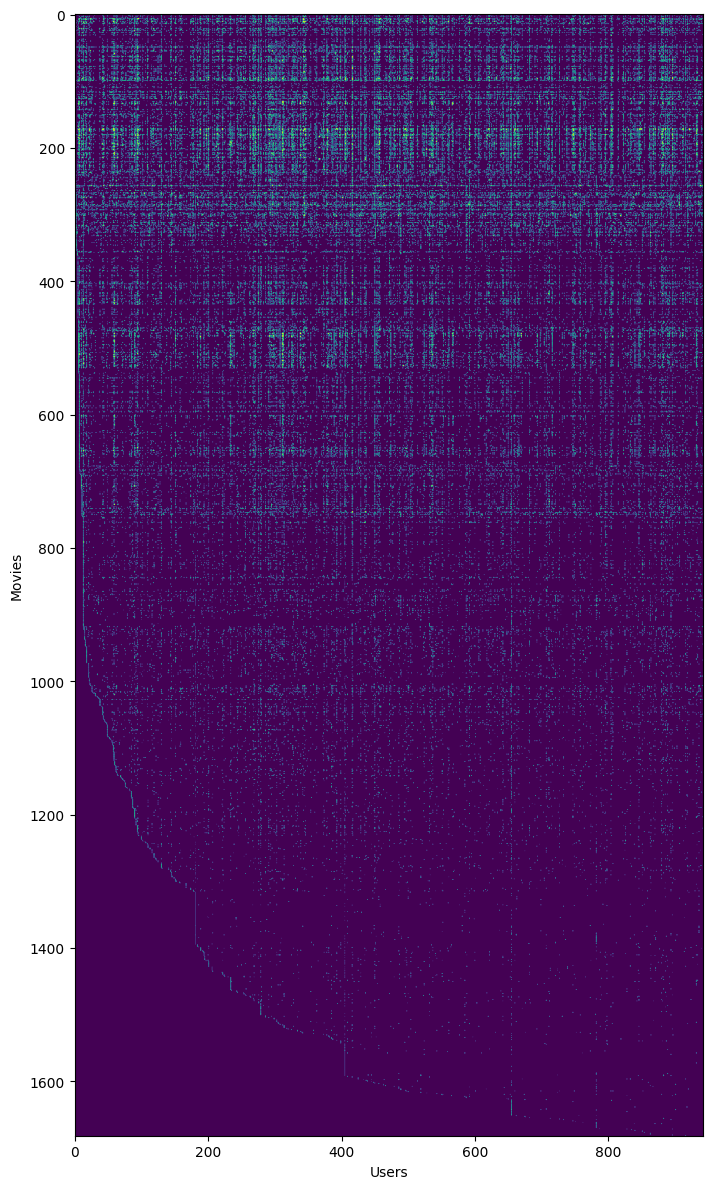

In [206]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(Y)
ax.set_xlabel('Users')
ax.set_ylabel('Movies')
fig.tight_layout()
plt.show()

接下来，我们将实施协同过滤的代价函数。 直觉上，“代价”是指一组电影评级预测偏离真实预测的程度。 代价方程在练习文本中给出。 它基于文本中称为X和Theta的两组参数矩阵。 这些“展开”到“参数”输入中，以便稍后可以使用SciPy的优化包。 请注意，我已经在注释中包含数组/矩阵形状（对于我们在本练习中使用的数据），以帮助说明矩阵交互如何工作。
# cost
<img style="float: left;" src="../img/rcmd_cost.png">

In [207]:
def cost(params, Y, R, num_features):
    Y = np.matrix(Y)  # (1682, 943)
    R = np.matrix(R)  # (1682, 943)
    num_movies = Y.shape[0]
    num_users = Y.shape[1]
    
    # reshape the parameter array into parameter matrices
    X = np.matrix(np.reshape(params[:num_movies * num_features], (num_movies, num_features)))  # (1682, 10)
    Theta = np.matrix(np.reshape(params[num_movies * num_features:], (num_users, num_features)))  # (943, 10)
    
    # initializations
    J = 0
    
    # compute the cost
    error = np.multiply((X * Theta.T) - Y, R)  # (1682, 943)
    squared_error = np.power(error, 2)  # (1682, 943)
    J = (1. / 2) * np.sum(squared_error)
    
    return J

为了测试这一点，我们提供了一组我们可以评估的预训练参数。 为了保持评估时间的少点，我们将只看一小段数据。

In [208]:
params_data = loadmat('data/ex8_movieParams.mat')
X = params_data['X']
Theta = params_data['Theta']
X.shape, Theta.shape

((1682, 10), (943, 10))

In [209]:
users = 4
movies = 5
features = 3

X_sub = X[:movies, :features]
Theta_sub = Theta[:users, :features]
Y_sub = Y[:movies, :users]
R_sub = R[:movies, :users]

params = np.concatenate((np.ravel(X_sub), np.ravel(Theta_sub)))

cost(params, Y_sub, R_sub, features)

22.224603725685675

 接下来我们需要实现梯度计算。 就像我们在练习4中使用神经网络实现一样，我们将扩展代价函数来计算梯度。

In [210]:
def cost(params, Y, R, num_features):
    Y = np.matrix(Y)  # (1682, 943)
    R = np.matrix(R)  # (1682, 943)
    num_movies = Y.shape[0]
    num_users = Y.shape[1]
    
    # reshape the parameter array into parameter matrices
    X = np.matrix(np.reshape(params[:num_movies * num_features], (num_movies, num_features)))  # (1682, 10)
    Theta = np.matrix(np.reshape(params[num_movies * num_features:], (num_users, num_features)))  # (943, 10)
    
    # initializations
    J = 0
    X_grad = np.zeros(X.shape)  # (1682, 10)
    Theta_grad = np.zeros(Theta.shape)  # (943, 10)
    
    # compute the cost
    error = np.multiply((X * Theta.T) - Y, R)  # (1682, 943)
    squared_error = np.power(error, 2)  # (1682, 943)
    J = (1. / 2) * np.sum(squared_error)
    
    # calculate the gradients
    X_grad = error * Theta
    Theta_grad = error.T * X
    
    # unravel the gradient matrices into a single array
    grad = np.concatenate((np.ravel(X_grad), np.ravel(Theta_grad)))
    
    return J, grad

In [211]:
J, grad = cost(params, Y_sub, R_sub, features)
J, grad

(22.224603725685675,
 array([ -2.52899165,   7.57570308,  -1.89979026,  -0.56819597,
          3.35265031,  -0.52339845,  -0.83240713,   4.91163297,
         -0.76677878,  -0.38358278,   2.26333698,  -0.35334048,
         -0.80378006,   4.74271842,  -0.74040871, -10.5680202 ,
          4.62776019,  -7.16004443,  -3.05099006,   1.16441367,
         -3.47410789,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ]))

我们的下一步是在代价和梯度计算中添加正则化。 我们将创建一个最终的正则化版本的功能（请注意，此版本包含一个额外的“学习率”参数，在文本中称为“lambda”）。

In [212]:
def cost(params, Y, R, num_features, learning_rate):
    Y = np.matrix(Y)  # (1682, 943)
    R = np.matrix(R)  # (1682, 943)
    num_movies = Y.shape[0]
    num_users = Y.shape[1]
    
    # reshape the parameter array into parameter matrices
    X = np.matrix(np.reshape(params[:num_movies * num_features], (num_movies, num_features)))  # (1682, 10)
    Theta = np.matrix(np.reshape(params[num_movies * num_features:], (num_users, num_features)))  # (943, 10)
    
    # initializations
    J = 0
    X_grad = np.zeros(X.shape)  # (1682, 10)
    Theta_grad = np.zeros(Theta.shape)  # (943, 10)
    
    # compute the cost
    error = np.multiply((X * Theta.T) - Y, R)  # (1682, 943)
    squared_error = np.power(error, 2)  # (1682, 943)
    J = (1. / 2) * np.sum(squared_error)
    
    # add the cost regularization
    J = J + ((learning_rate / 2) * np.sum(np.power(Theta, 2)))
    J = J + ((learning_rate / 2) * np.sum(np.power(X, 2)))
    
    # calculate the gradients with regularization
    X_grad = (error * Theta) + (learning_rate * X)
    Theta_grad = (error.T * X) + (learning_rate * Theta)
    
    # unravel the gradient matrices into a single array
    grad = np.concatenate((np.ravel(X_grad), np.ravel(Theta_grad)))
    
    return J, grad

In [213]:
J, grad = cost(params, Y_sub, R_sub, features, 1.5)
J, grad

(31.34405624427422,
 array([ -0.95596339,   6.97535514,  -0.10861109,   0.60308088,
          2.77421145,   0.25839822,   0.12985616,   4.0898522 ,
         -0.89247334,   0.29684395,   1.06300933,   0.66738144,
          0.60252677,   4.90185327,  -0.19747928, -10.13985478,
          2.10136256,  -6.76563628,  -2.29347024,   0.48244098,
         -2.99791422,  -0.64787484,  -0.71820673,   1.27006666,
          1.09289758,  -0.40784086,   0.49026541]))

这个结果再次与练习代码的预期输出相匹配，所以看起来正则化是正常的。 在我们训练模型之前，我们有一个最后步骤， 我们的任务是创建自己的电影评分，以便我们可以使用该模型来生成个性化的推荐。 为我们提供一个连接电影索引到其标题的文件。 接着我们将文件加载到字典中。

In [214]:
movie_idx = {}
f = open('data/movie_ids.txt',encoding= 'gbk')
for line in f:
    tokens = line.split(' ')
    tokens[-1] = tokens[-1][:-1]
    movie_idx[int(tokens[0]) - 1] = ' '.join(tokens[1:])

In [215]:
movie_idx[0]

'Toy Story (1995)'

我们将使用练习中提供的评分。

In [216]:
ratings = np.zeros((1682, 1))

ratings[0] = 4
ratings[6] = 3
ratings[11] = 5
ratings[53] = 4
ratings[63] = 5
ratings[65] = 3
ratings[68] = 5
ratings[97] = 2
ratings[182] = 4
ratings[225] = 5
ratings[354] = 5

print('Rated {0} with {1} stars.'.format(movie_idx[0], str(int(ratings[0]))))
print('Rated {0} with {1} stars.'.format(movie_idx[6], str(int(ratings[6]))))
print('Rated {0} with {1} stars.'.format(movie_idx[11], str(int(ratings[11]))))
print('Rated {0} with {1} stars.'.format(movie_idx[53], str(int(ratings[53]))))
print('Rated {0} with {1} stars.'.format(movie_idx[63], str(int(ratings[63]))))
print('Rated {0} with {1} stars.'.format(movie_idx[65], str(int(ratings[65]))))
print('Rated {0} with {1} stars.'.format(movie_idx[68], str(int(ratings[68]))))
print('Rated {0} with {1} stars.'.format(movie_idx[97], str(int(ratings[97]))))
print('Rated {0} with {1} stars.'.format(movie_idx[182], str(int(ratings[182]))))
print('Rated {0} with {1} stars.'.format(movie_idx[225], str(int(ratings[225]))))
print('Rated {0} with {1} stars.'.format(movie_idx[354], str(int(ratings[354]))))

Rated Toy Story (1995) with 4 stars.
Rated Twelve Monkeys (1995) with 3 stars.
Rated Usual Suspects, The (1995) with 5 stars.
Rated Outbreak (1995) with 4 stars.
Rated Shawshank Redemption, The (1994) with 5 stars.
Rated While You Were Sleeping (1995) with 3 stars.
Rated Forrest Gump (1994) with 5 stars.
Rated Silence of the Lambs, The (1991) with 2 stars.
Rated Alien (1979) with 4 stars.
Rated Die Hard 2 (1990) with 5 stars.
Rated Sphere (1998) with 5 stars.


We can add our own ratings vector to the existing data set to include in the model.
我们可以将自己的评级向量添加到现有数据集中以包含在模型中。

In [217]:
R = data['R']
Y = data['Y']

Y = np.append(Y, ratings, axis=1)
R = np.append(R, ratings != 0, axis=1)

Y.shape, R.shape, ratings.shape

((1682, 944), (1682, 944), (1682, 1))

我们不只是准备训练协同过滤模型。 我们只需要定义一些变量并对评级进行规一化。

In [218]:
movies = Y.shape[0]  # 1682
users = Y.shape[1]  # 944
features = 10
learning_rate = 10.

X = np.random.random(size=(movies, features))
Theta = np.random.random(size=(users, features))
params = np.concatenate((np.ravel(X), np.ravel(Theta)))

X.shape, Theta.shape, params.shape

((1682, 10), (944, 10), (26260,))

In [219]:
Ymean = np.zeros((movies, 1))
Ynorm = np.zeros((movies, users))

for i in range(movies):
    idx = np.where(R[i,:] == 1)[0]
    Ymean[i] = Y[i,idx].mean()
    Ynorm[i,idx] = Y[i,idx] - Ymean[i]

Ynorm.mean()

5.507036456515984e-19

In [220]:
from scipy.optimize import minimize

fmin = minimize(fun=cost, x0=params, args=(Ynorm, R, features, learning_rate), 
                method='CG', jac=True, options={'maxiter': 100})
fmin

     fun: 38976.25414217241
     jac: array([-0.20759637,  0.05151675, -0.23470633, ...,  0.0002825 ,
        0.00507141,  0.00848404])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 150
     nit: 100
    njev: 150
  status: 1
 success: False
       x: array([ 0.15113609, -0.01297483, -0.30078586, ..., -0.0809174 ,
       -0.00782626, -0.00242418])

In [221]:
X = np.matrix(np.reshape(fmin.x[:movies * features], (movies, features)))
Theta = np.matrix(np.reshape(fmin.x[movies * features:], (users, features)))

X.shape, Theta.shape

((1682, 10), (944, 10))

我们训练好的参数是X和Theta。 我们可以使用这些来为我们添加的用户创建一些建议。

In [222]:
predictions = X * Theta.T 
my_preds = predictions[:, -1] + Ymean
my_preds.shape

(1682, 1)

In [223]:
sorted_preds = np.sort(my_preds, axis=0)[::-1]
sorted_preds[:10]

matrix([[5.00000293],
        [5.00000167],
        [5.00000025],
        [5.00000004],
        [4.99999997],
        [4.99999973],
        [4.99999967],
        [4.99999915],
        [4.99999908],
        [4.99999888]])

这给了我们一个排名最高的评级，但我们失去了这些评级的索引。 我们实际上需要使用argsort函数来预测评分对应的电影。

In [224]:
idx = np.argsort(my_preds, axis=0)[::-1]
print("Top 10 movie predictions:")
for i in range(10):
    j = int(idx[i])
    print('Predicted rating of {0} for movie {1}.'.format(str(float(my_preds[j])), movie_idx[j]))

Top 10 movie predictions:
Predicted rating of 5.000002926752965 for movie Prefontaine (1997).
Predicted rating of 5.00000166698208 for movie Great Day in Harlem, A (1994).
Predicted rating of 5.0000002515711515 for movie Marlene Dietrich: Shadow and Light (1996) .
Predicted rating of 5.000000044032934 for movie Aiqing wansui (1994).
Predicted rating of 4.999999970364416 for movie Entertaining Angels: The Dorothy Day Story (1996).
Predicted rating of 4.99999972594598 for movie Someone Else's America (1995).
Predicted rating of 4.9999996661507975 for movie They Made Me a Criminal (1939).
Predicted rating of 4.999999151511823 for movie Saint of Fort Washington, The (1993).
Predicted rating of 4.999999081337298 for movie Star Kid (1997).
Predicted rating of 4.999998884249607 for movie Santa with Muscles (1996).
